In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
import keras
import matplotlib as mt
import sklearn
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

# Percentage to split by for training
perc = 90

# Set for training the model
data = raw_data.head(int(len(raw_data)*(perc/100)))

# Set for testing the model later to get the real accuracy
test_set = raw_data.tail(int(len(raw_data)*((100-perc)/100)))

x_values = data.values[:,1:-1]

y_values = np.array(data['y'])
y_values = np_utils.to_categorical(y_values)
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=1)

x_train = x_train.reshape(-1, 178, 1)
x_test = x_test.reshape(-1, 178, 1)

print("X Train: {}\nX Test: {}\nY Train: {}\nY Test {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

X Train: (8280, 178, 1)
X Test: (2070, 178, 1)
Y Train: (8280, 6)
Y Test (2070, 6)


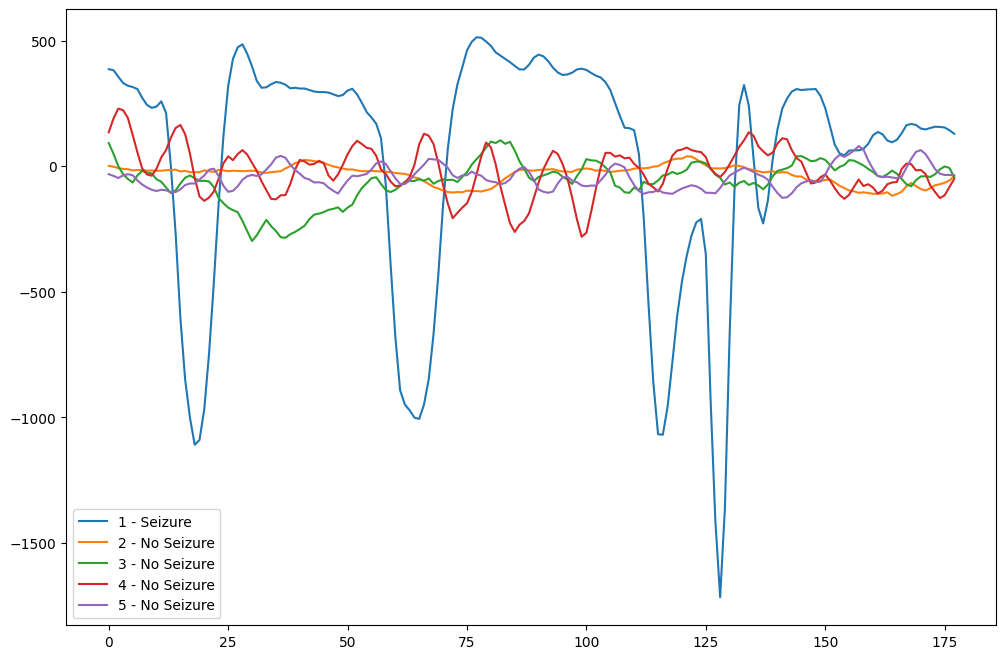

In [3]:
# Set the size of the chart
plt.figure(figsize=(12,8))

# Plot data labeled 1 - Seizure
plt.plot(x_values[1, :], label="1 - Seizure")

# Plot data labeled 2 - No Seizure
plt.plot(x_values[7, :], label="2 - No Seizure")

# Plot data labeled 3 - No Seizure
plt.plot(x_values[12, :], label="3 - No Seizure")

# Plot data labeled 4 - No Seizure
plt.plot(x_values[0, :], label="4 - No Seizure")

# Plot data labeled 5 - No Seizure
plt.plot(x_values[2, :], label="5 - No Seizure")

# Create a legend and output the graph
plt.legend()
plt.show()


In [4]:
# Create a Sequential LSTM model
model = Sequential()
model.add(LSTM(56, input_shape=(45, 1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Output the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 56)            12992     
                                                                 
 dropout (Dropout)           (None, 45, 56)            0         
                                                                 
 lstm_1 (LSTM)               (None, 56)                25312     
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense (Dense)               (None, 20)                1140      
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1